### 1. 학습과정 살펴보기(Matplotlib & Tensorboard)

In [1]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
import numpy as np

In [165]:
#1. 데이터 셋 생성
#1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [166]:
#훈련 셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [167]:
x_train = x_train.reshape(50000, 784).astype('float32')
x_val = x_val.reshape(10000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

In [168]:
#훈련 셋과 검증 셋 고르기
"""
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]

x_val = x_val[val_rand_idx]
y_val = y_val[val_rand_idx]
"""

'\ntrain_rand_idxs = np.random.choice(50000, 700)\nval_rand_idxs = np.random.choice(10000, 300)\n\nx_train = x_train[train_rand_idxs]\ny_train = y_train[train_rand_idxs]\n\nx_val = x_val[val_rand_idx]\ny_val = y_val[val_rand_idx]\n'

In [169]:
#라벨 데이터 원핫 인코딩 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [175]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=28, input_dim=28*28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [176]:
#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [177]:
#4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
hist = model.fit(x_train, y_train, epochs=15, batch_size=100, validation_data=(x_val, y_val), callbacks=[tb_hist])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 2s 44us/step - loss: 8.8185 - acc: 0.4471 - val_loss: 5.9113 - val_acc: 0.6292
Epoch 2/15
50000/50000 [==============================] - 2s 46us/step - loss: 4.6232 - acc: 0.7100 - val_loss: 3.7845 - val_acc: 0.7636
Epoch 3/15
50000/50000 [==============================] - 2s 45us/step - loss: 4.8249 - acc: 0.6991 - val_loss: 3.8271 - val_acc: 0.7616
Epoch 4/15
50000/50000 [==============================] - 2s 45us/step - loss: 4.7325 - acc: 0.7054 - val_loss: 6.1168 - val_acc: 0.6196
Epoch 5/15
50000/50000 [==============================] - 2s 44us/step - loss: 4.9571 - acc: 0.6915 - val_loss: 3.8761 - val_acc: 0.7587
Epoch 6/15
50000/50000 [==============================] - 2s 44us/step - loss: 4.6540 - acc: 0.7105 - val_loss: 4.0900 - val_acc: 0.7459
Epoch 7/15
50000/50000 [==============================] - 2s 44us/step - loss: 5.3105 - acc: 0.6700 - val_loss: 3.9930 - val_acc

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

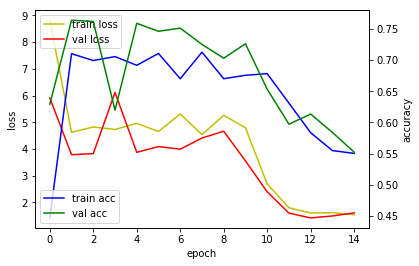

In [179]:
#5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [180]:
#6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss: ' + str(loss_and_metrics[0]))
print('accuracy: ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 32us/step

loss: 1.62763912354
accuracy: 0.524


### 2. 학습 조기 종료 시키기

In [13]:
#1. 데이터 셋 생성
#1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#훈련 셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

x_train = x_train.reshape(50000, 784).astype('float32')
x_val = x_val.reshape(10000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

#라벨 데이터 원핫 인코딩 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [25]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=28, input_dim=28*28, activation='sigmoid'))
model.add(Dense(units=28, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

In [26]:
#3. 모델 학습과정 설정하기
sgd = keras.optimizers.SGD(lr=0.5, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])

In [27]:
#4. 모델 학습시키기
from keras.callbacks import EarlyStopping
#monitor, min_delta, patience, verbose, mode
early_stopping = EarlyStopping(patience=20)
hist = model.fit(x_train, y_train, epochs=3000, batch_size=100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 50000 samples, validate on 10000 samples
Epoch 1/3000
50000/50000 [==============================] - 2s 49us/step - loss: 1.8540 - acc: 0.3342 - val_loss: 1.6460 - val_acc: 0.3703
Epoch 2/3000
50000/50000 [==============================] - 2s 42us/step - loss: 1.6445 - acc: 0.3862 - val_loss: 1.9681 - val_acc: 0.2773
Epoch 3/3000
50000/50000 [==============================] - 2s 44us/step - loss: 1.8596 - acc: 0.3040 - val_loss: 2.0043 - val_acc: 0.2081
Epoch 4/3000
50000/50000 [==============================] - 2s 47us/step - loss: 1.7116 - acc: 0.3463 - val_loss: 1.4420 - val_acc: 0.4735
Epoch 5/3000
50000/50000 [==============================] - 2s 44us/step - loss: 1.3807 - acc: 0.4810 - val_loss: 1.3867 - val_acc: 0.4442
Epoch 6/3000
50000/50000 [==============================] - 2s 45us/step - loss: 1.3426 - acc: 0.4993 - val_loss: 1.3273 - val_acc: 0.5159
Epoch 7/3000
50000/50000 [==============================] - 2s 46us/step - loss: 1.3376 - acc: 0.4917 - val_loss: 1.

50000/50000 [==============================] - 2s 44us/step - loss: 0.9565 - acc: 0.6629 - val_loss: 0.9017 - val_acc: 0.6796
Epoch 60/3000
50000/50000 [==============================] - 2s 46us/step - loss: 1.0148 - acc: 0.6236 - val_loss: 0.9806 - val_acc: 0.6537
Epoch 61/3000
50000/50000 [==============================] - 2s 45us/step - loss: 0.9823 - acc: 0.6600 - val_loss: 0.9393 - val_acc: 0.6656
Epoch 62/3000
50000/50000 [==============================] - 2s 43us/step - loss: 0.9628 - acc: 0.6579 - val_loss: 0.9181 - val_acc: 0.6414


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

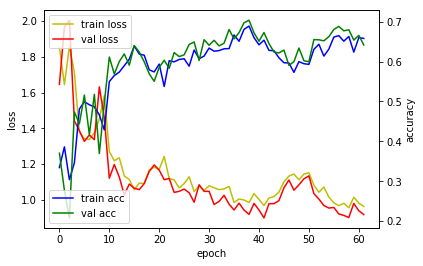

In [30]:
#5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [31]:
#6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss: ' + str(loss_and_metrics[0]))
print('accuracy: ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 41us/step

loss: 0.943841133881
accuracy: 0.6388


### 3. Layer 개념 잡기

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.